# Work Notebook

This Nootebook have the goal to calculate the total energy inside a hexahedric element
applying the continum mechanics equations [Bonet 1997]

In [1]:
import jax.numpy as jnp
import matplotlib.pyplot as plt
import pyvista as pv
import Elements as EL
import Material as mat
from jax import random
import numpy as np
import jax
key = random.key(0)

2024-04-10 18:11:24.712131: W external/xla/xla/service/gpu/nvptx_compiler.cc:718] The NVIDIA driver's CUDA version is 12.0 which is older than the ptxas CUDA version (12.4.131). Because the driver is older than the ptxas version, XLA is disabling parallel compilation, which may slow down compilation. You should update your NVIDIA driver or use the NVIDIA-provided CUDA forward compatibility packages.


/home/nicolas/Escritorio/Low-Dimension-Deep-Energy/env/lib/python3.10/site-packages/pyvista/jupyter/notebook.py:34: UserWarning: Failed to use notebook backend: 

cannot import name 'vtk' from 'trame.widgets' (/home/nicolas/Escritorio/Low-Dimension-Deep-Energy/env/lib/python3.10/site-packages/trame/widgets/__init__.py)

Falling back to a static output.
  warnings.warn(


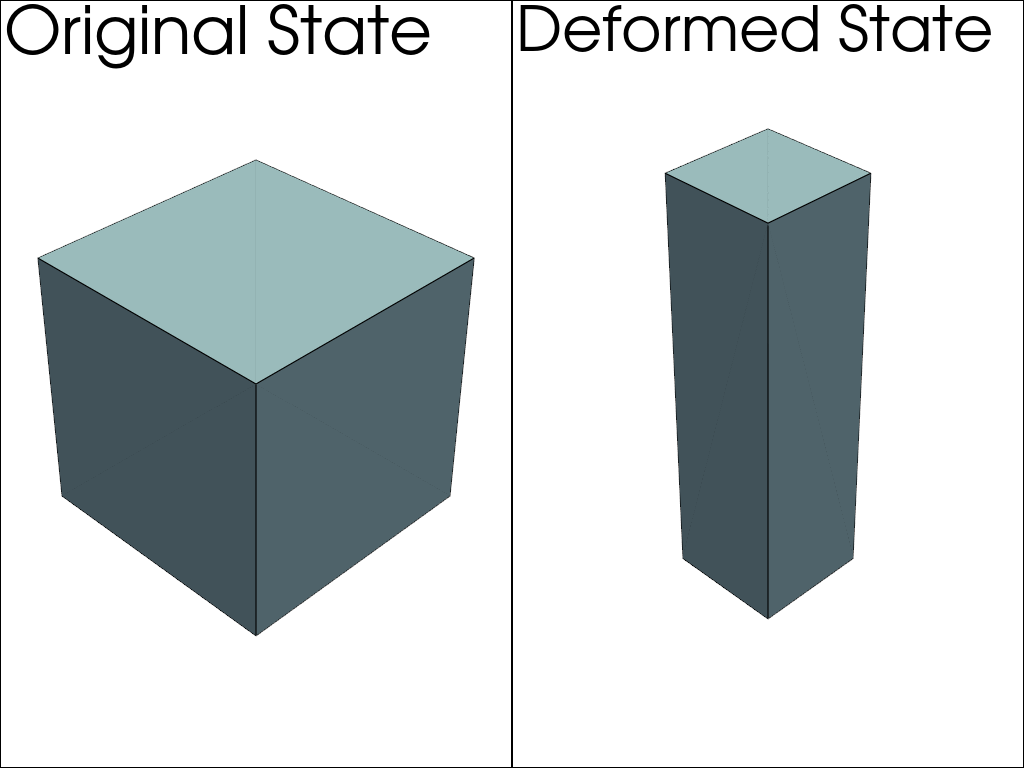

In [2]:
## import mesh

mesh = pv.read('/home/nicolas/Escritorio/Codigos/JAX/Unit_Tests/unit_cube.msh')  #Orgiinal File
mesh.clear_data()

## displacement from FEM software (Vulcan)
disp = np.load('/home/nicolas/Escritorio/Codigos/JAX/Unit_Tests/cube_displacements.npy')[-1,:,:]  # The orden of this file is [time, node, dim]
mesh_def = mesh.copy()
mesh_def.points += disp

pl = pv.Plotter(shape=(1, 2))


pl.subplot(0, 0)
pl.add_text("Original State", font_size=30)
pl.add_mesh(mesh, show_edges=True, color='lightblue',opacity = 1)


pl.subplot(0, 1)
pl.add_text("Deformed State", font_size=30)
pl.add_mesh(mesh_def, show_edges=True, color='lightblue')


# # Display the window
pl.show()

In [3]:
# material_1 = mat.Neo_hooke_incompressible([1,0])
material_2 = mat.Delphino([30.0E-3,3.77,0])
# malla_1 = EL.Hexs(material_1, mesh.points, mesh.cells_dict[12])
malla_2 = EL.Hexs(material_2, mesh.points, mesh.cells_dict[12])

In [5]:
print(malla_2.psi_jax(disp))


[[3.6815722 3.6815722 3.6815722 3.6815722 3.6815722 3.6815722 3.6815722
  3.6815722]]


In [7]:
print(malla_2.S_jax(disp))

[[[[-3.2061676e+01 -1.9078172e-21  2.5084225e-07]
   [-8.4275932e-22 -3.2061676e+01  2.0067377e-07]
   [ 2.5084222e-07  2.0067377e-07  5.1159658e+00]]

  [[-3.2061676e+01 -3.8606760e-07  2.5084225e-07]
   [-3.8606757e-07 -3.2061676e+01  1.5050534e-07]
   [ 2.5084222e-07  1.5050533e-07  5.1159658e+00]]

  [[-3.2061676e+01  5.5601259e-22 -2.0067377e-07]
   [-3.8303471e-22 -3.2061676e+01  1.5050534e-07]
   [-2.0067377e-07  1.5050533e-07  5.1159658e+00]]

  [[-3.2061676e+01  3.8606763e-07 -2.0067377e-07]
   [ 3.8606757e-07 -3.2061676e+01  2.0067377e-07]
   [-2.0067377e-07  2.0067377e-07  5.1159658e+00]]

  [[-3.2061676e+01 -3.0790554e-21 -2.0067377e-07]
   [-1.1469869e-21 -3.2061676e+01 -1.6053901e-06]
   [-2.0067377e-07 -1.6053901e-06  5.1159658e+00]]

  [[-3.2061676e+01 -1.0965197e-06 -2.0067384e-07]
   [-1.0965197e-06 -3.2061676e+01 -1.4047165e-06]
   [-2.0067382e-07 -1.4047165e-06  5.1159668e+00]]

  [[-3.2061676e+01 -6.0202143e-07 -2.2672864e-07]
   [-6.0202149e-07 -3.2061676e+01 -1.4

In [8]:
print(malla_2.PSI(disp))

[7.9306464]


In [10]:
print(malla_2.Cauchy(disp))

TypeError: transpose permutation isn't a permutation of operand dimensions, got permutation (0, 2, 1) for operand shape (1, 8, 3, 3).

In [3]:
def Demiray(landa,c1,c2):
    aux = (c2/2)*((landa**2)+(2/landa)-3)
    sigma = c1*np.e**(aux)*((landa**2)-(1/landa))
    return sigma
